# Bank Transaction Dataset for Fraud Detection

## Introduction
This dataset contains **2,512 bank transactions** with **16 features** related to transaction details, customer information, and device/location data. The goal is to analyze the dataset to detect fraudulent transactions and build a predictive model for fraud detection.

### Dataset Overview:
- **Rows**: 2,512 transactions
- **Columns**: 16 features (described below)

## Dataset Columns Description

Below is a detailed description of each column in the dataset:

1. **TransactionID**: Unique alphanumeric identifier for each transaction.
2. **AccountID**: Unique identifier for each account, with multiple transactions per account.
3. **TransactionAmount**: Monetary value of each transaction, ranging from small everyday expenses to larger purchases.
4. **TransactionDate**: Timestamp of each transaction, capturing date and time.
5. **TransactionType**: Categorical field indicating 'Credit' or 'Debit' transactions.
6. **Location**: Geographic location of the transaction, represented by U.S. city names.
7. **DeviceID**: Alphanumeric identifier for devices used to perform the transaction.
8. **IP Address**: IPv4 address associated with the transaction, with occasional changes for some accounts.
9. **MerchantID**: Unique identifier for merchants, showing preferred and outlier merchants for each account.
10. **Channel**: Channel through which the transaction was performed (e.g., Online, ATM, Branch).
11. **CustomerAge**: Age of the account holder, with logical groupings based on occupation.
12. **CustomerOccupation**: Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns.
13. **TransactionDuration**: Duration of the transaction in seconds, varying by transaction type.
14. **LoginAttempts**: Number of login attempts before the transaction, with higher values indicating potential anomalies.
15. **AccountBalance**: Balance in the account post-transaction, with logical correlations based on transaction type and amount.
16. **PreviousTransactionDate**: Timestamp of the last transaction for the account, aiding in calculating transaction frequency.

## Load the dataset

In [1001]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/bank_transactions.csv')

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


## Basic Dataset Information

Let’s explore the dataset's structure and summary statistics to understand its composition.

In [1002]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

### Observations from `df.info()`:
- The dataset has **2,512 rows** and **16 columns**.
- There are **no missing values** in any column (all columns have 2,512 non-null entries).
- Data types include:
  - **Float64**: `TransactionAmount`, `AccountBalance`
  - **Int64**: `CustomerAge`, `TransactionDuration`, `LoginAttempts`
  - **Object**: All other columns (e.g., `TransactionID`, `AccountID`, `TransactionDate`, etc.)

In [1003]:
# Display summary statistics for numerical columns
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


### Observations from `df.describe()`:

1. **TransactionAmount**:
   - Average: **\$297.59**, with a wide range from **\$0.26** to **\$1,919.11**.
   - 75% of transactions are below **\$414.53**.

2. **CustomerAge**:
   - Average age: **44.67 years**, ranging from **18** to **80**.
   - Median age: **45 years**.

3. **TransactionDuration**:
   - Average duration: **119.64 seconds**, ranging from **10** to **300 seconds**.
   - 75% of transactions complete in under **161 seconds**.

4. **LoginAttempts**:
   - Average: **1.12 attempts**, with most transactions (75%) involving only **1 attempt**.
   - Maximum attempts: **5**.

5. **AccountBalance**:
   - Average balance: **\$5,114.30**, ranging from **\$101.25** to **\$14,977.99**.
   - Median balance: **\$4,735.51**.


## Data Cleaning

In [1004]:
df.isnull().sum()


TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [1005]:
df.duplicated().sum()


np.int64(0)

## Data Convertion

In [1006]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df[['TransactionDate', 'PreviousTransactionDate']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionDate          2512 non-null   datetime64[ns]
 1   PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 39.4 KB


## Outliers Check

In [1007]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo global para los gráficos con fondo gris y bordes blancos suaves
sns.set_theme(style="whitegrid", palette="muted", rc={
    "axes.facecolor": "#284B63",  # Fondo gris oscuro para los contenedores
    "figure.facecolor": "#284B63",  # Fondo gris oscuro para toda la figura
    "grid.color": "#D9D9D9",  # Gris más claro para la cuadrícula
    "axes.grid": True,  # Mostrar cuadrícula
    "axes.edgecolor": "#D9D9D9",  # Bordes de los contenedores en gris claro
    "xtick.color": "#D9D9D9",  # Color de las etiquetas del eje X en gris claro
    "ytick.color": "#D9D9D9",  # Color de las etiquetas del eje Y en gris claro
    "axes.labelcolor": "#D9D9D9",  # Color de las etiquetas de los ejes en gris claro
    "axes.titlesize": 14,  # Tamaño de los títulos
    "axes.titleweight": 'bold',  # Hacer los títulos en negrita
})

custom_palette = ["#D9D9D9", "#A0A0A0"]

# Crear una función personalizada para los boxplots
def custom_boxplot(*args, **kwargs):
    kwargs.setdefault("color", "#D9D9D9")  # Relleno de la caja en gris claro
    kwargs.setdefault("flierprops", dict(markerfacecolor='#D9D9D9', marker='o', markersize=7))
    kwargs.setdefault("boxprops", dict(edgecolor='#D9D9D9', linewidth=1))
    kwargs.setdefault("medianprops", dict(color='#D9D9D9', linewidth=1))
    kwargs.setdefault("capprops", dict(color='#D9D9D9', linewidth=1))
    kwargs.setdefault("whiskerprops", dict(color='#D9D9D9', linewidth=1))
    
    return sns.boxplot(*args, **kwargs)

def custom_countplot(*args, **kwargs):
    # Personalizar colores de los gráficos countplot
    kwargs.setdefault("palette", "dark:#D9D9D9")  # Color de las barras (gris claro)
    kwargs.setdefault("edgecolor", "#D9D9D9")  # Bordes de las barras (gris claro)
    
     # Crear el gráfico countplot
    ax = sns.countplot(*args, **kwargs)

    # Personalizar la leyenda si existe
    legend = ax.legend()
    if legend:
        plt.setp(legend.get_texts(), color="#D9D9D9")  # Cambiar el color del texto de la leyenda
        legend.get_frame().set_edgecolor("#D9D9D9")  # Color del borde de la leyenda

    return ax

def custom_scatterplot(x, y, data, **kwargs):
    kwargs.setdefault("color", "#D9D9D9")  # Color de los puntos
    kwargs.setdefault("edgecolor", "#D9D9D9")  # Borde de los puntos
    kwargs.setdefault("s", 50)  # Tamaño de los puntos
    kwargs.setdefault("alpha", 0.7)  # Transparencia para evitar saturación visual

    return sns.scatterplot(x=x, y=y, data=data, **kwargs)

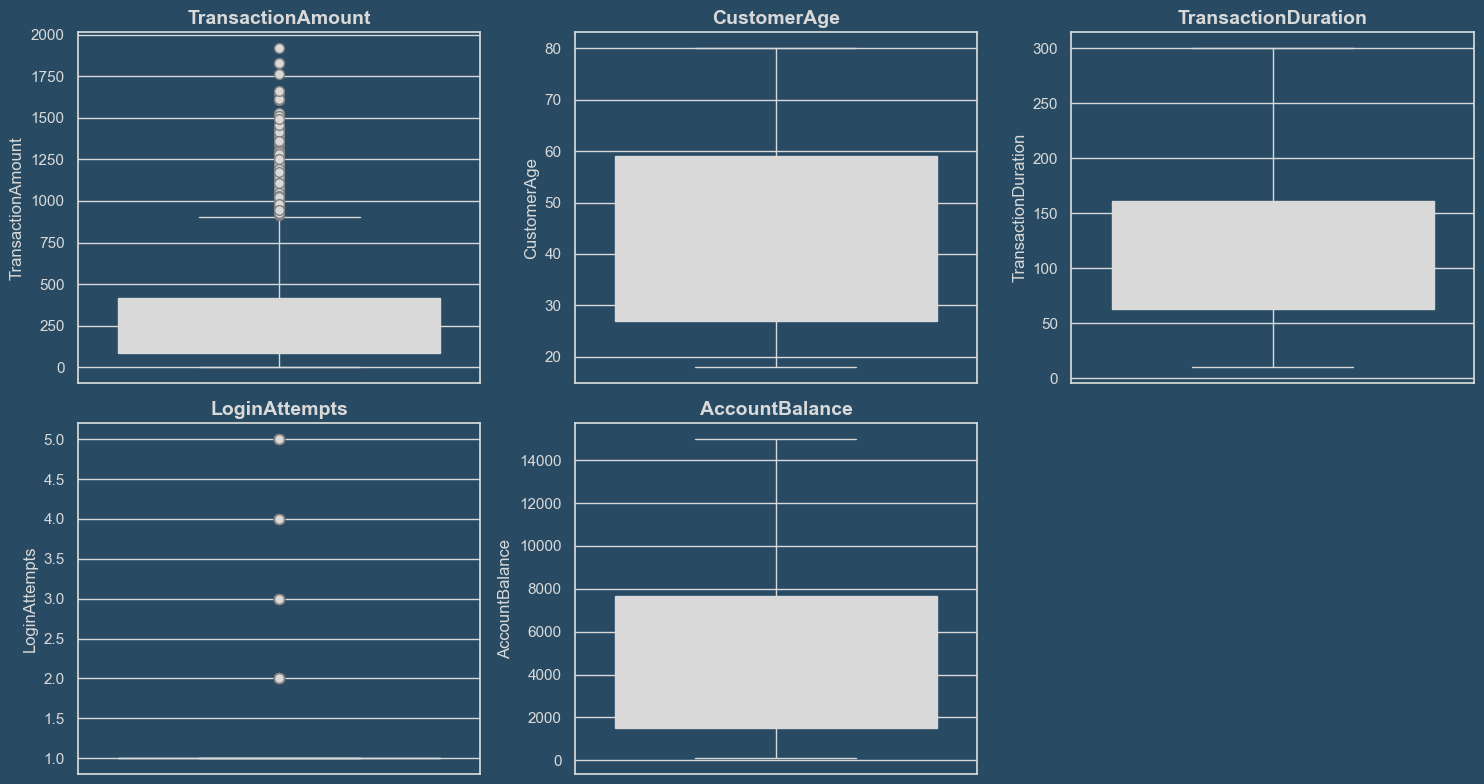

In [1008]:
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    custom_boxplot(y=df[col])  # Usamos la función personalizada
    plt.title(col, color='#D9D9D9')  # Títulos en gris claro
plt.tight_layout()
plt.show()

### Observations:
1. **TransactionAmount**:
   - Some transactions have very high amounts (up to \$1,919.11), which could be outliers or legitimate large transactions.
2. **CustomerAge**:
   - The age range (18 to 80) is reasonable, with no outliers.
3. **TransactionDuration**:
   - Some transactions take up to 300 seconds (5 minutes), which might be outliers or indicate unusual activity.
4. **LoginAttempts**:
   - Most transactions involve 1 login attempt, but some have up to 5 attempts, which could indicate anomalies.
5. **AccountBalance**:
   - Some accounts have very high balances (up to \$14,977.99), which could be outliers or legitimate for high-net-worth individuals.

### Action:
- We’ll keep the outliers for now, as they might be important for fraud detection (e.g., unusually high transaction amounts or login attempts).

## Unique Values Categorical Columns

In [1009]:
# Check unique values in categorical columns
categorical_columns = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']

for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")
    print("\n")

Unique values in TransactionType: ['Debit' 'Credit']


Unique values in Location: ['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']


Unique values in DeviceID: ['D000380' 'D000051' 'D000235' 'D000187' 'D000308' 'D000579' 'D000241'
 'D000500' 'D000690' 'D000199' 'D000205' 'D000589' 'D000032' 'D000054'
 'D000309' 'D000466' 'D000671' 'D000432' 'D000530' 'D000039' 'D000152'
 'D000268' 'D000142' 'D000162' 'D000036' 'D000046' 'D000310' 'D000232'
 'D000297' 'D000587' 'D000282' 'D000621' 'D000111' 'D000357' 'D000042'
 'D000250' 'D000448' 

### Observations:
1. **TransactionType**:
   - Only two values: `Debit` and `Credit`. No inconsistencies.
2. **Location**:
   - All values are valid U.S. city names. No inconsistencies.
3. **DeviceID**:
   - All values are alphanumeric and unique. No inconsistencies.
4. **IP Address**:
   - All values are valid IPv4 addresses. No inconsistencies.
5. **MerchantID**:
   - All values are alphanumeric and unique. No inconsistencies.
6. **Channel**:
   - Only three values: `Branch`, `ATM`, and `Online`. No inconsistencies.
7. **CustomerOccupation**:
   - Only four values: `Student`, `Doctor`, `Engineer`, and `Retired`. No inconsistencies.


## Summary of Data Cleaning

1. **No Missing Values or Duplicates**:
   - The dataset is clean, with no missing values or duplicate rows.

2. **Data Type Conversion**:
   - `TransactionDate` and `PreviousTransactionDate` have been converted to `datetime`.

3. **Outliers**:
   - Outliers were identified in `TransactionAmount`, `TransactionDuration`, and `LoginAttempts`, but they were retained as they might be relevant for fraud detection.

4. **Categorical Data**:
   - No inconsistencies were found in categorical columns.

The dataset is now ready for **Exploratory Data Analysis (EDA)**.

## Exploratory Data Analysis (EDA)

In this step, we’ll explore the dataset visually and statistically to uncover patterns, trends, and relationships. EDA helps us understand the data better and identify potential features for fraud detection.

### 1. Univariate Analysis


#### Numerical Columns

We are not using Account ID and Transaction ID because they are not relevant in this analysis


### Transaction Amount

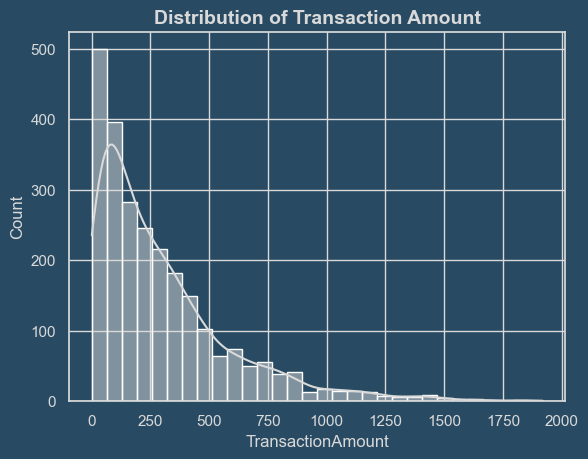

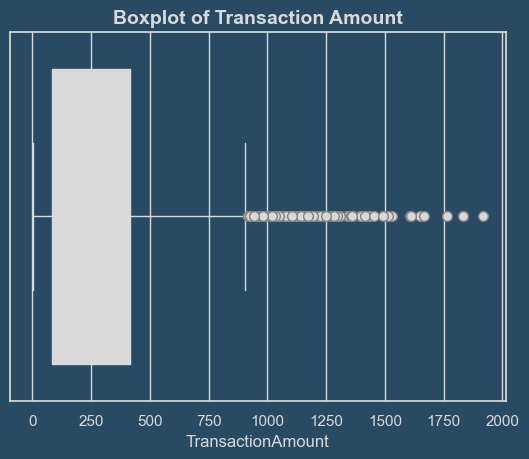

In [1010]:
# Histogram for TransactionAmount
sns.histplot(df['TransactionAmount'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Transaction Amount',color="#D9D9D9")
plt.show()

# Boxplot for TransactionAmount
custom_boxplot(x=df['TransactionAmount'])
plt.title('Boxplot of Transaction Amount',color="#D9D9D9")
plt.show()

### Costumer Age

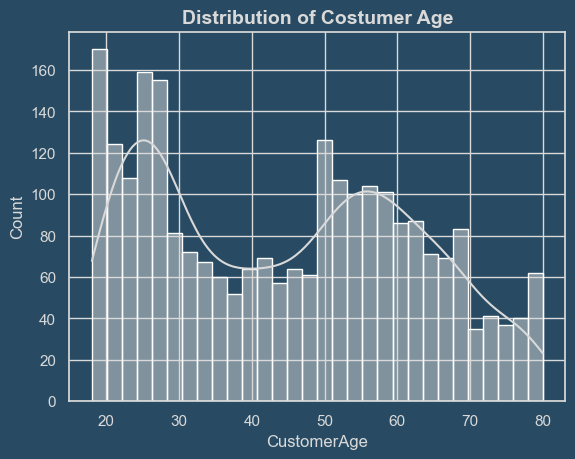

In [1011]:

# Histogram for CustomerAge
sns.histplot(df['CustomerAge'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Costumer Age',color="#D9D9D9")
plt.show()


### Account Balance

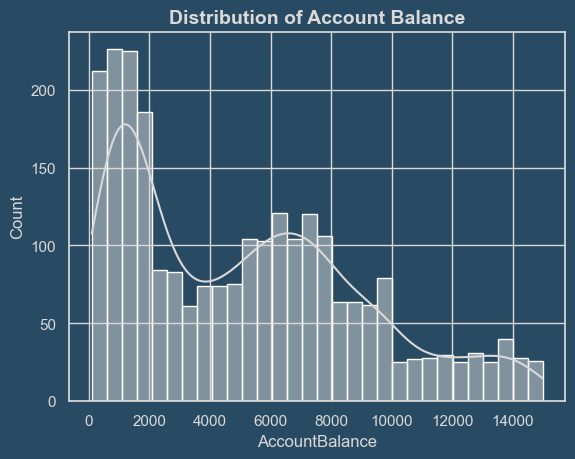

In [1012]:

# Histogram for AccountBalance
sns.histplot(df['AccountBalance'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Account Balance',color="#D9D9D9")
plt.show()


### Transaction Duration

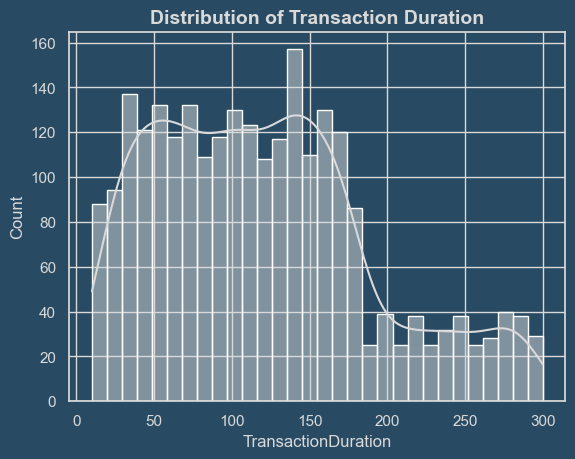

In [1013]:

# Histogram for TransactionDuration
sns.histplot(df['TransactionDuration'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Transaction Duration',color="#D9D9D9")
plt.show()



### Login Attempts

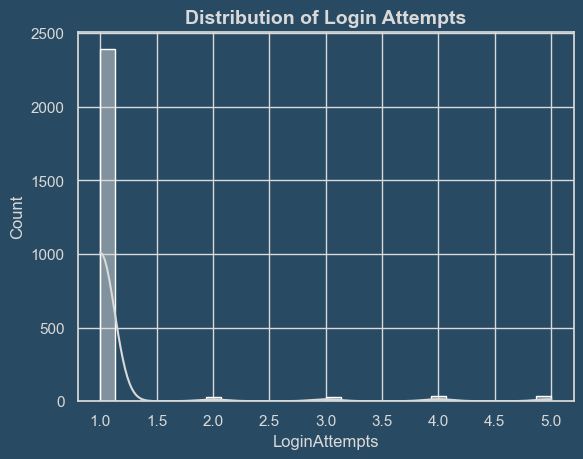

In [1014]:

# Histogram for LoginAttempts
sns.histplot(df['LoginAttempts'], bins=30, kde=True, color="#D9D9D9")
plt.title('Distribution of Login Attempts',color="#D9D9D9")
plt.show()


### Categorical Columns

#### TransactionType

C:\Users\HAYAI\AppData\Local\Temp\ipykernel_9816\1698513462.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend()


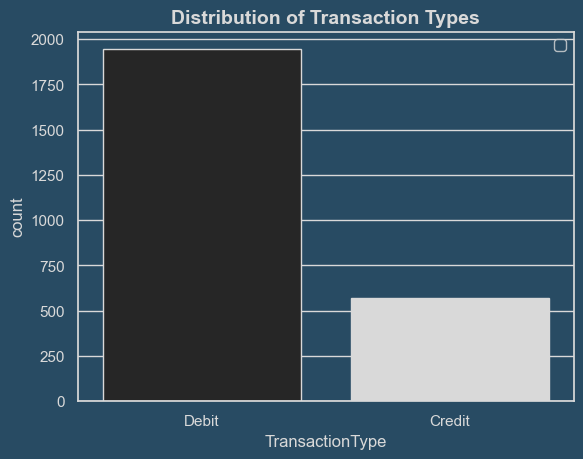

In [1015]:
# Transaction Type
custom_countplot(x='TransactionType', hue='TransactionType' , data=df)
plt.title('Distribution of Transaction Types', color="#D9D9D9")
plt.show()


### Location

C:\Users\HAYAI\AppData\Local\Temp\ipykernel_9816\1698513462.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend()


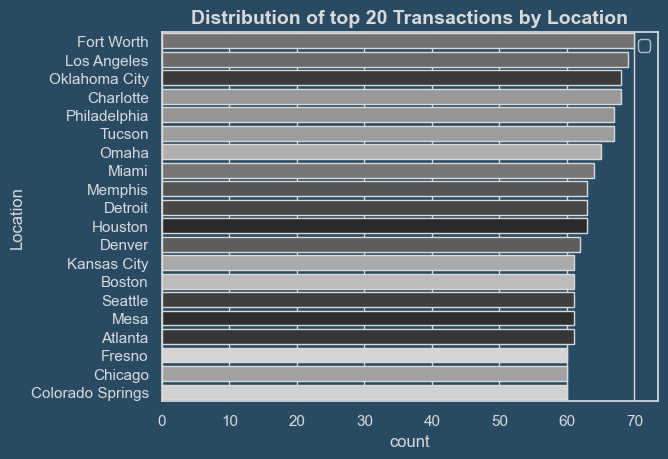

In [1016]:
# Location

top_10_locations = df['Location'].value_counts().index[:20]

custom_countplot(y='Location', data=df, hue='Location', order=top_10_locations)
plt.title('Distribution of top 20 Transactions by Location', color="#D9D9D9")
plt.show()

### Channel

C:\Users\HAYAI\AppData\Local\Temp\ipykernel_9816\1698513462.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend()


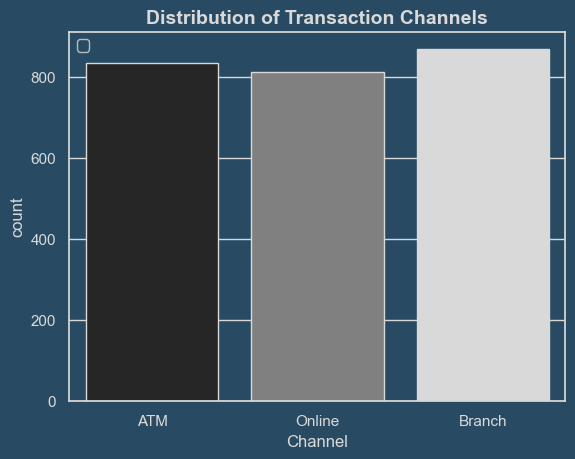

In [1017]:
custom_countplot(x='Channel', hue='Channel', data=df)
plt.title('Distribution of Transaction Channels', color="#D9D9D9")
plt.show()

### CustomerOccupation

C:\Users\HAYAI\AppData\Local\Temp\ipykernel_9816\1698513462.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend()


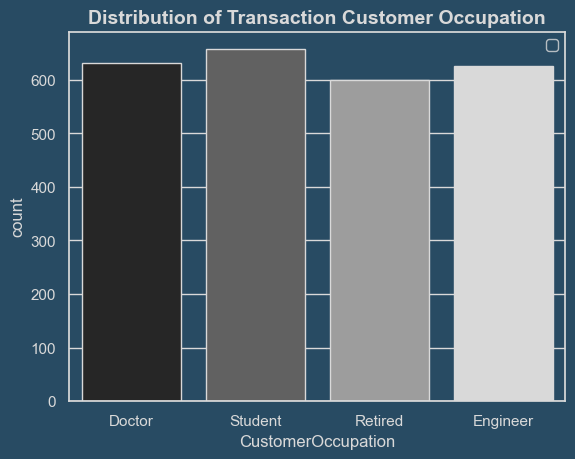

In [1018]:
custom_countplot(x='CustomerOccupation' ,hue='CustomerOccupation' , data=df)
plt.title('Distribution of Transaction Customer Occupation', color="#D9D9D9")
plt.show()

## Bivariate Analysis

### TransactionAmount vs AccountBalance



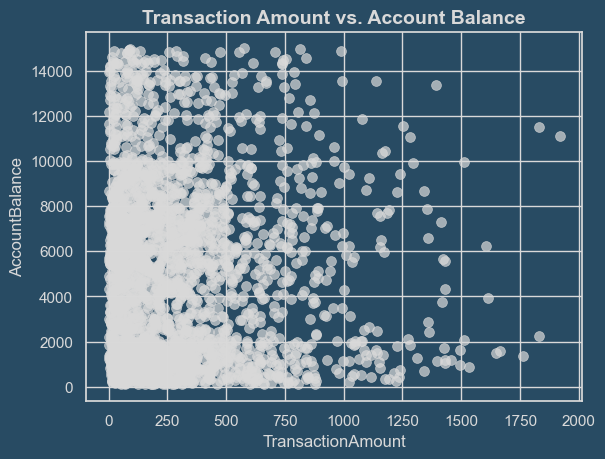

In [1019]:
custom_scatterplot(x='TransactionAmount', y='AccountBalance', data=df, )
plt.title('Transaction Amount vs. Account Balance', color="#D9D9D9")
plt.show()

### TransactionAmount vs CustomerAge



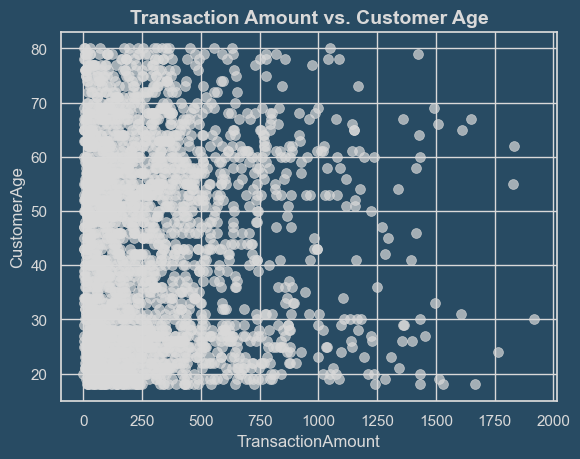

In [1020]:
custom_scatterplot(x='TransactionAmount', y='CustomerAge', data=df)
plt.title('Transaction Amount vs. Customer Age', color="#D9D9D9")
plt.show()

### TransactionAmount vs TransactionDuration



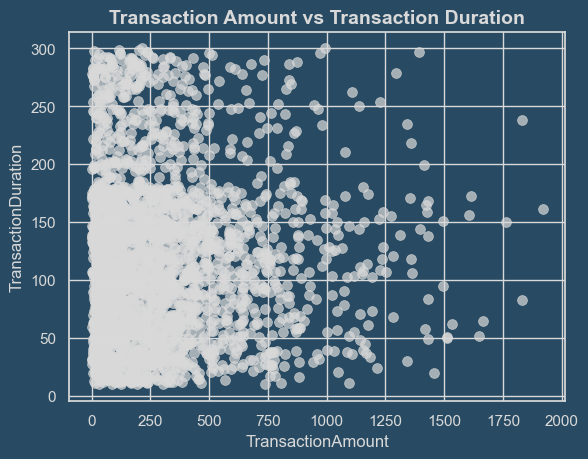

In [1021]:
custom_scatterplot(x='TransactionAmount', y='TransactionDuration', data=df)
plt.title('Transaction Amount vs Transaction Duration', color="#D9D9D9")
plt.show()

### AccountBalance vs CustomerAge	

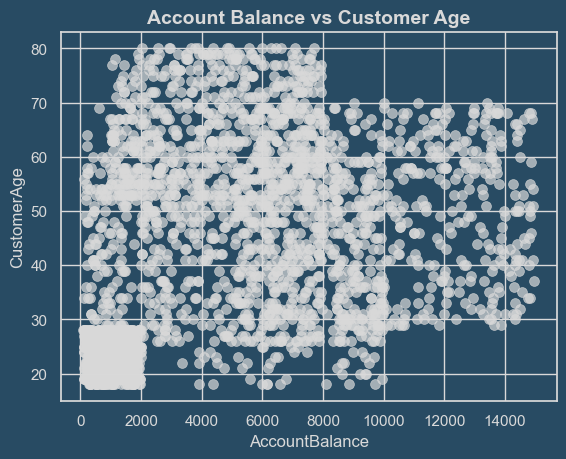

In [1022]:
custom_scatterplot(x='AccountBalance', y='CustomerAge', data=df)
plt.title('Account Balance vs Customer Age', color="#D9D9D9")
plt.show()

### AccountBalance vs TransactionDuration	

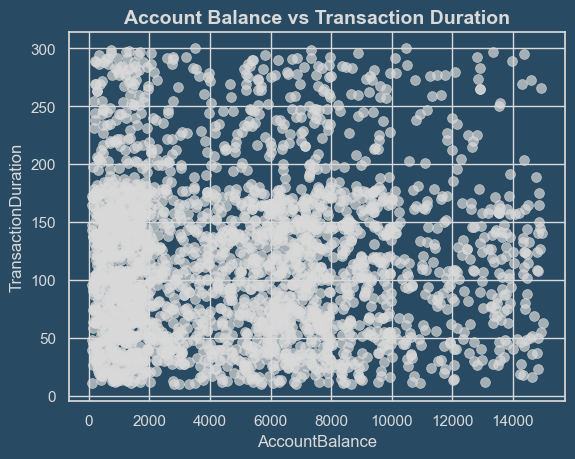

In [1023]:
custom_scatterplot(x='AccountBalance', y='TransactionDuration', data=df)
plt.title('Account Balance vs Transaction Duration', color="#D9D9D9")
plt.show()

## Numerical vs Categorical


### TransactionAmount vs TransactionType



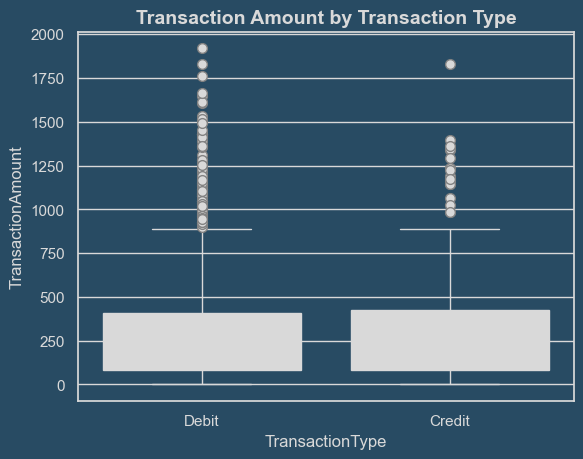

In [1024]:
custom_boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Transaction Type', color="#D9D9D9")
plt.show()

### TransactionAmount vs Location



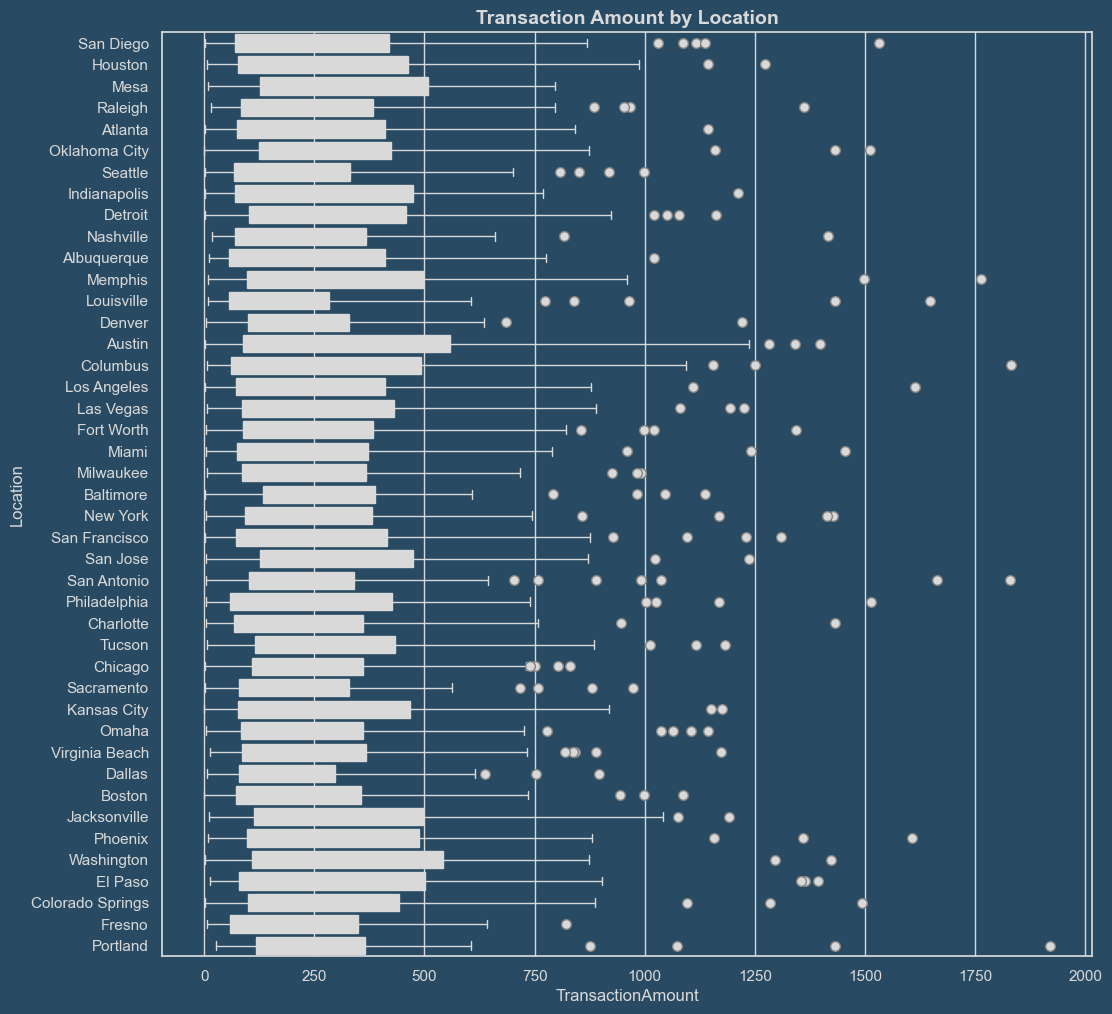

In [1025]:
plt.figure(figsize=(12, 12))  # Aumentar tamaño
custom_boxplot(y='Location', x='TransactionAmount', data=df)
plt.title('Transaction Amount by Location', color="#D9D9D9")
plt.show()


### TransactionAmount vs Channel



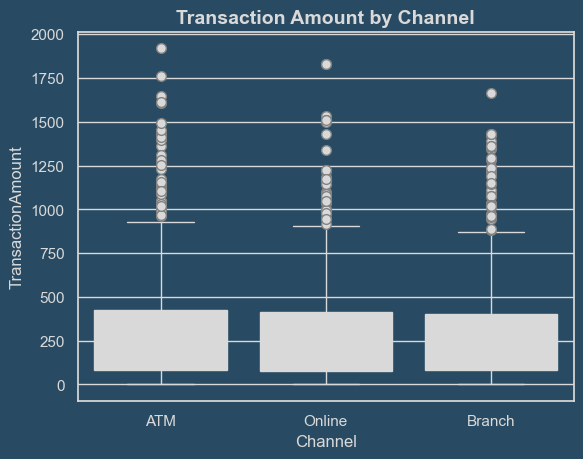

In [1026]:
custom_boxplot(x='Channel', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Channel', color="#D9D9D9")
plt.show()

### CustomerAge vs TransactionType	

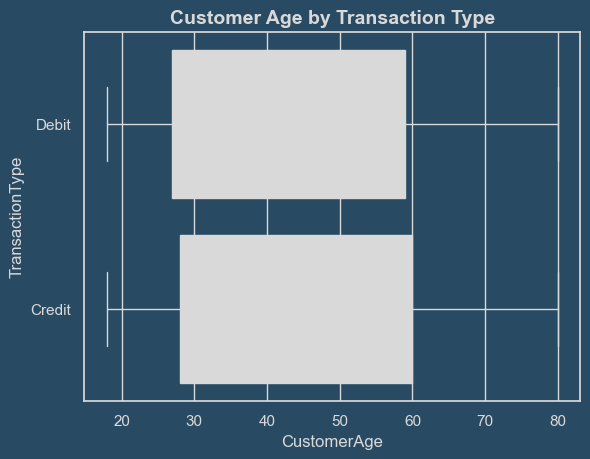

In [1027]:
custom_boxplot(x='CustomerAge', y='TransactionType', data=df)
plt.title('Customer Age by Transaction Type', color="#D9D9D9")
plt.show()

### AccountBalance vs TransactionType	

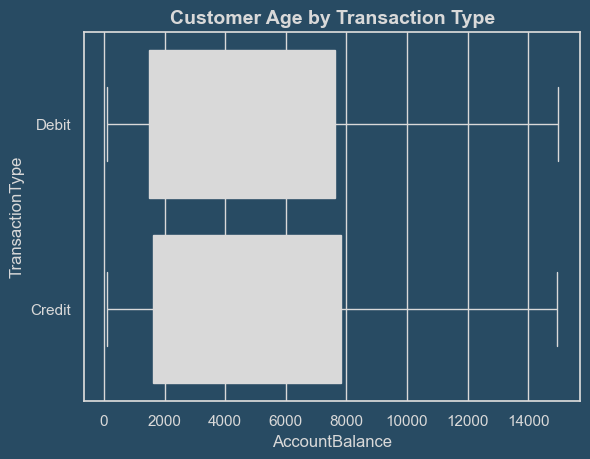

In [1028]:
custom_boxplot(x='AccountBalance', y='TransactionType', data=df)
plt.title('Customer Age by Transaction Type', color="#D9D9D9")
plt.show()

## Categorical vs Categorical


### TransactionType vs Location

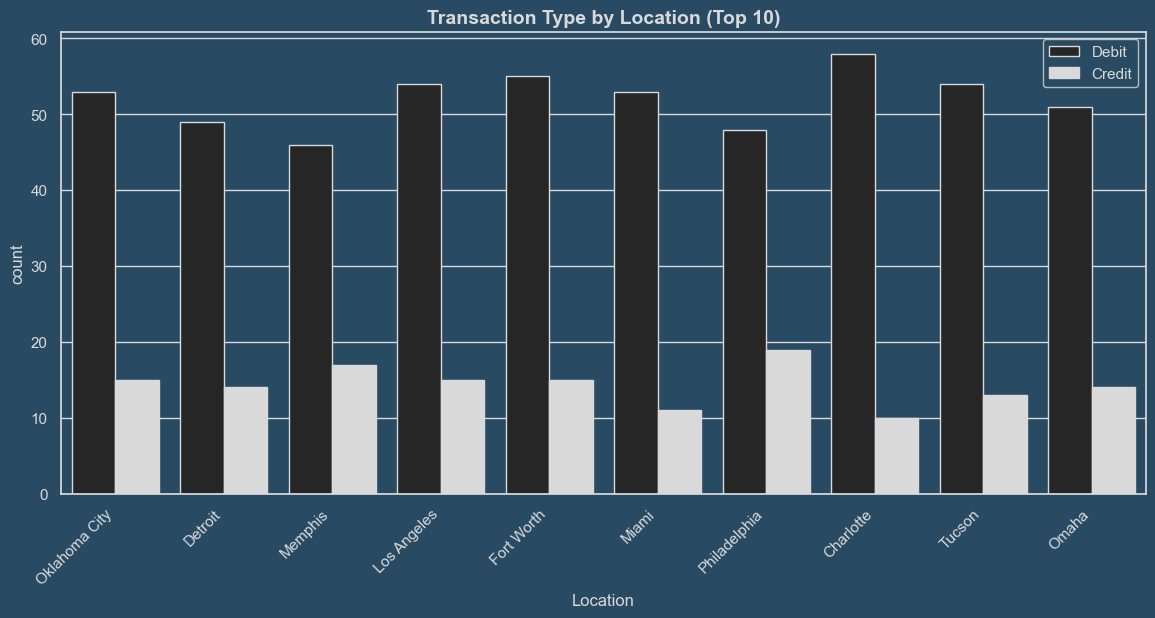

In [1029]:
plt.figure(figsize=(14, 6))  # Aumentar el tamaño del gráfico
top_10_locations = df['Location'].value_counts().index[:10]
df_filtered = df[df['Location'].isin(top_10_locations)]
custom_countplot(x='Location', hue='TransactionType', data=df_filtered)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas
plt.title('Transaction Type by Location (Top 10)', color="#D9D9D9")
plt.show()


### TransactionType vs Channel

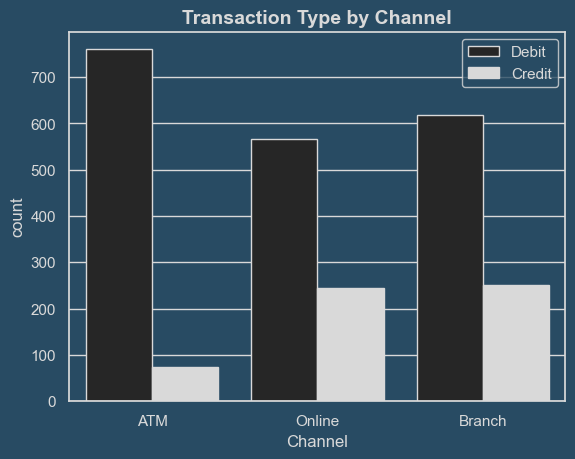

In [1030]:
custom_countplot(x='Channel', hue='TransactionType', data=df)
plt.title('Transaction Type by Channel', color="#D9D9D9")
plt.show()

### Location vs Channel	

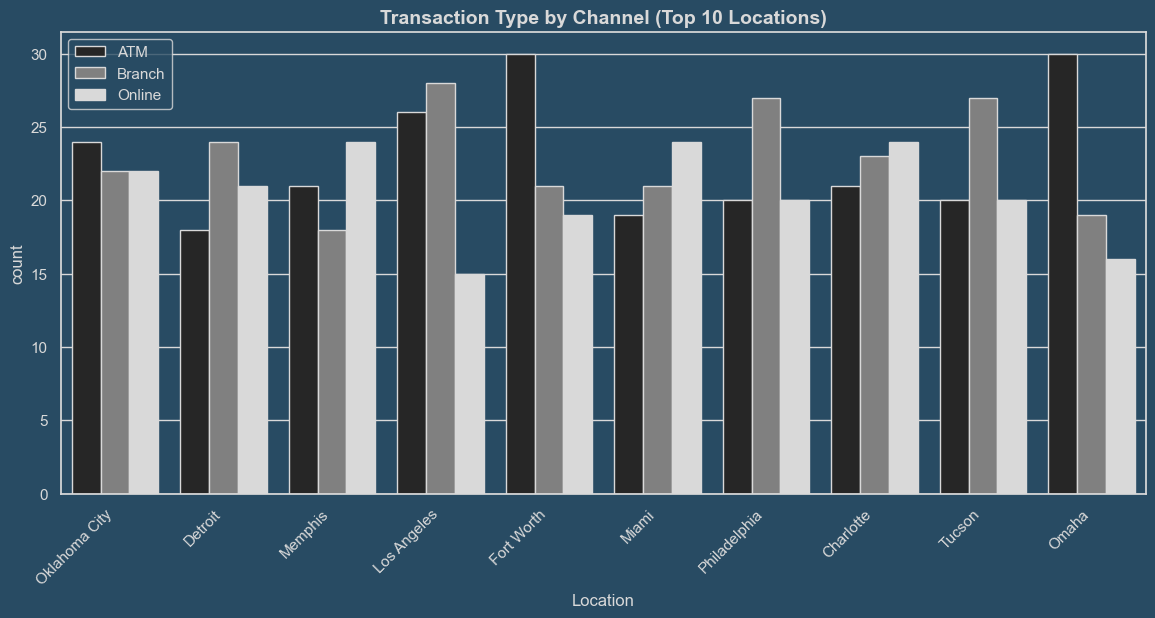

In [1031]:
# Seleccionar las 10 ubicaciones más frecuentes
top_10_locations = df['Location'].value_counts().index[:10]
df_filtered = df[df['Location'].isin(top_10_locations)]

# Graficar solo con esas ubicaciones
plt.figure(figsize=(14, 6))  # Hacer el gráfico más ancho
custom_countplot(x='Location', hue='Channel', data=df_filtered)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas para que no se superpongan
plt.title('Transaction Type by Channel (Top 10 Locations)', color="#D9D9D9")
plt.show()


### TransactionType vs CustomerOccupation

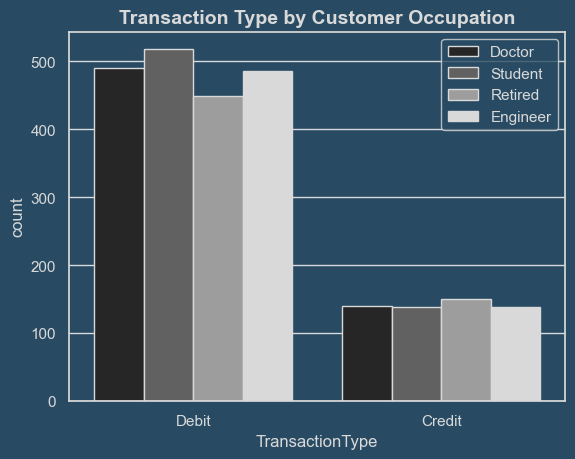

In [1032]:
custom_countplot(x='TransactionType', hue='CustomerOccupation', data=df)
plt.title('Transaction Type by Customer Occupation', color="#D9D9D9")
plt.show()

### Location vs CustomerOccupation	

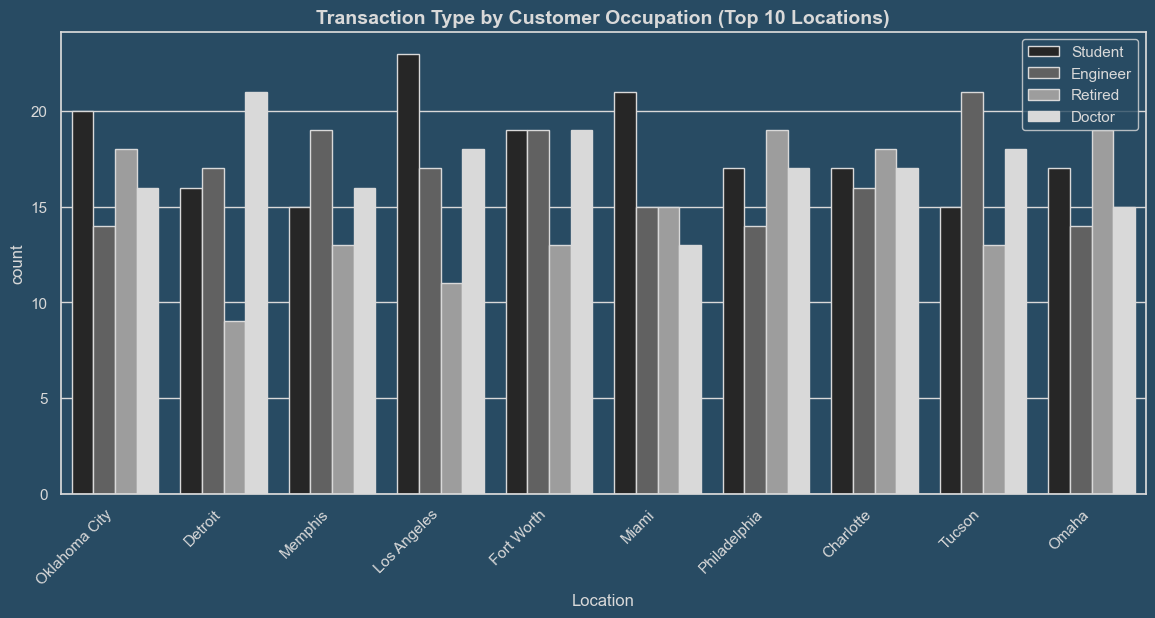

In [1033]:
# Seleccionar las 10 ubicaciones más frecuentes
top_10_locations = df['Location'].value_counts().index[:10]
df_filtered = df[df['Location'].isin(top_10_locations)]

# Graficar solo con esas ubicaciones
plt.figure(figsize=(14, 6))  # Hacer el gráfico más ancho
custom_countplot(x='Location', hue='CustomerOccupation', data=df_filtered)
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas para que no se superpongan
plt.title('Transaction Type by Customer Occupation (Top 10 Locations)', color="#D9D9D9")
plt.show()


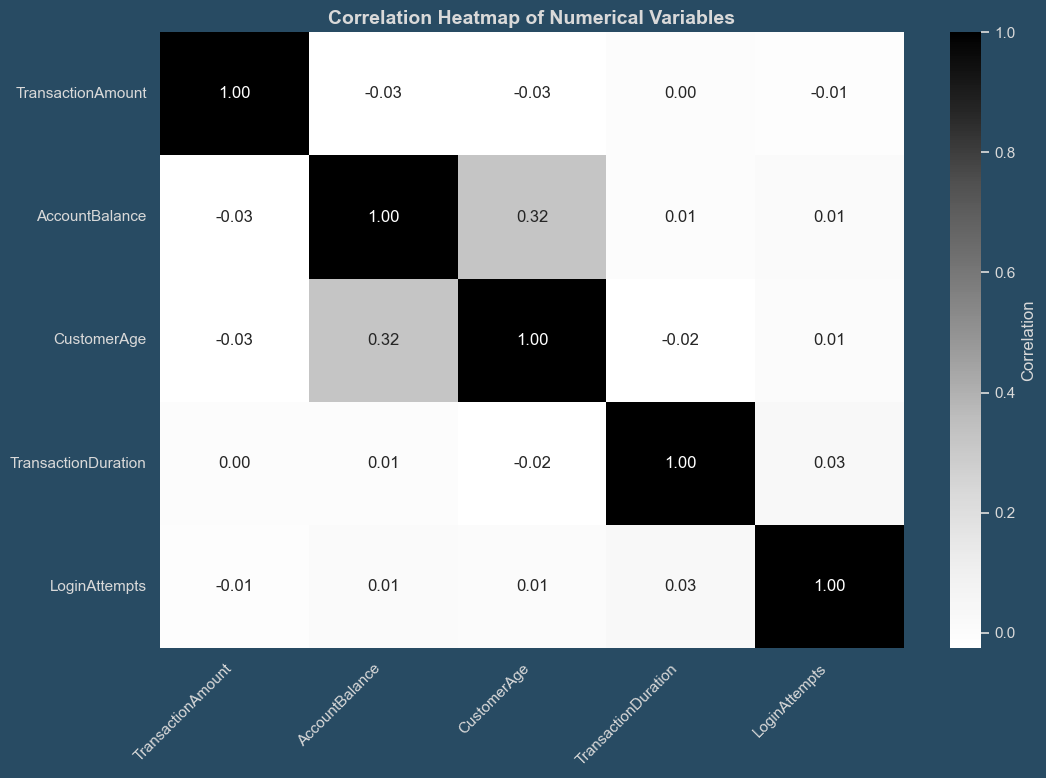

In [1034]:
# Select numerical columns
numerical_columns = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))  # Hacer el gráfico más grande para mejorar la visualización

# Usar paleta de colores basada en tonos grises
sns.heatmap(correlation_matrix, annot=True, cmap="Greys", fmt=".2f", annot_kws={"size": 12, "ha": "center", "va": "center"}, cbar_kws={'label': 'Correlation'})

# Personalización adicional
plt.title('Correlation Heatmap of Numerical Variables', color="#D9D9D9")
plt.xticks(rotation=45, ha="right", color="#D9D9D9")  # Rotar las etiquetas del eje X y color
plt.yticks(rotation=0, color="#D9D9D9")  # Cambiar color de las etiquetas del eje Y
plt.show()


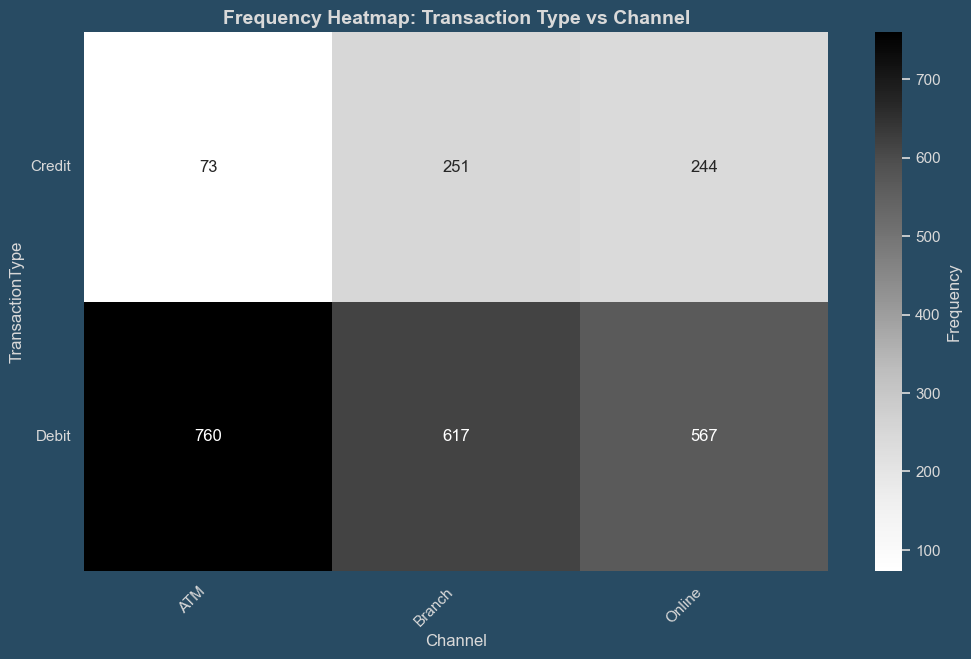

In [1035]:
# Create a cross-tabulation of TransactionType and Channel
cross_tab = pd.crosstab(df['TransactionType'], df['Channel'])

# Plot heatmap
plt.figure(figsize=(12, 7))  # Hacer el gráfico más grande para mejorar la visualización

# Usar paleta de colores basada en tonos grises
sns.heatmap(cross_tab, annot=True, cmap="Greys", fmt="d", annot_kws={"size": 12, "ha": "center", "va": "center"}, cbar_kws={'label': 'Frequency'})

# Personalización adicional
plt.title('Frequency Heatmap: Transaction Type vs Channel', color="#D9D9D9")
plt.xticks(rotation=45, ha="right", color="#D9D9D9")  # Rotar las etiquetas del eje X y color
plt.yticks(rotation=0, color="#D9D9D9")  # Cambiar color de las etiquetas del eje Y
plt.show()


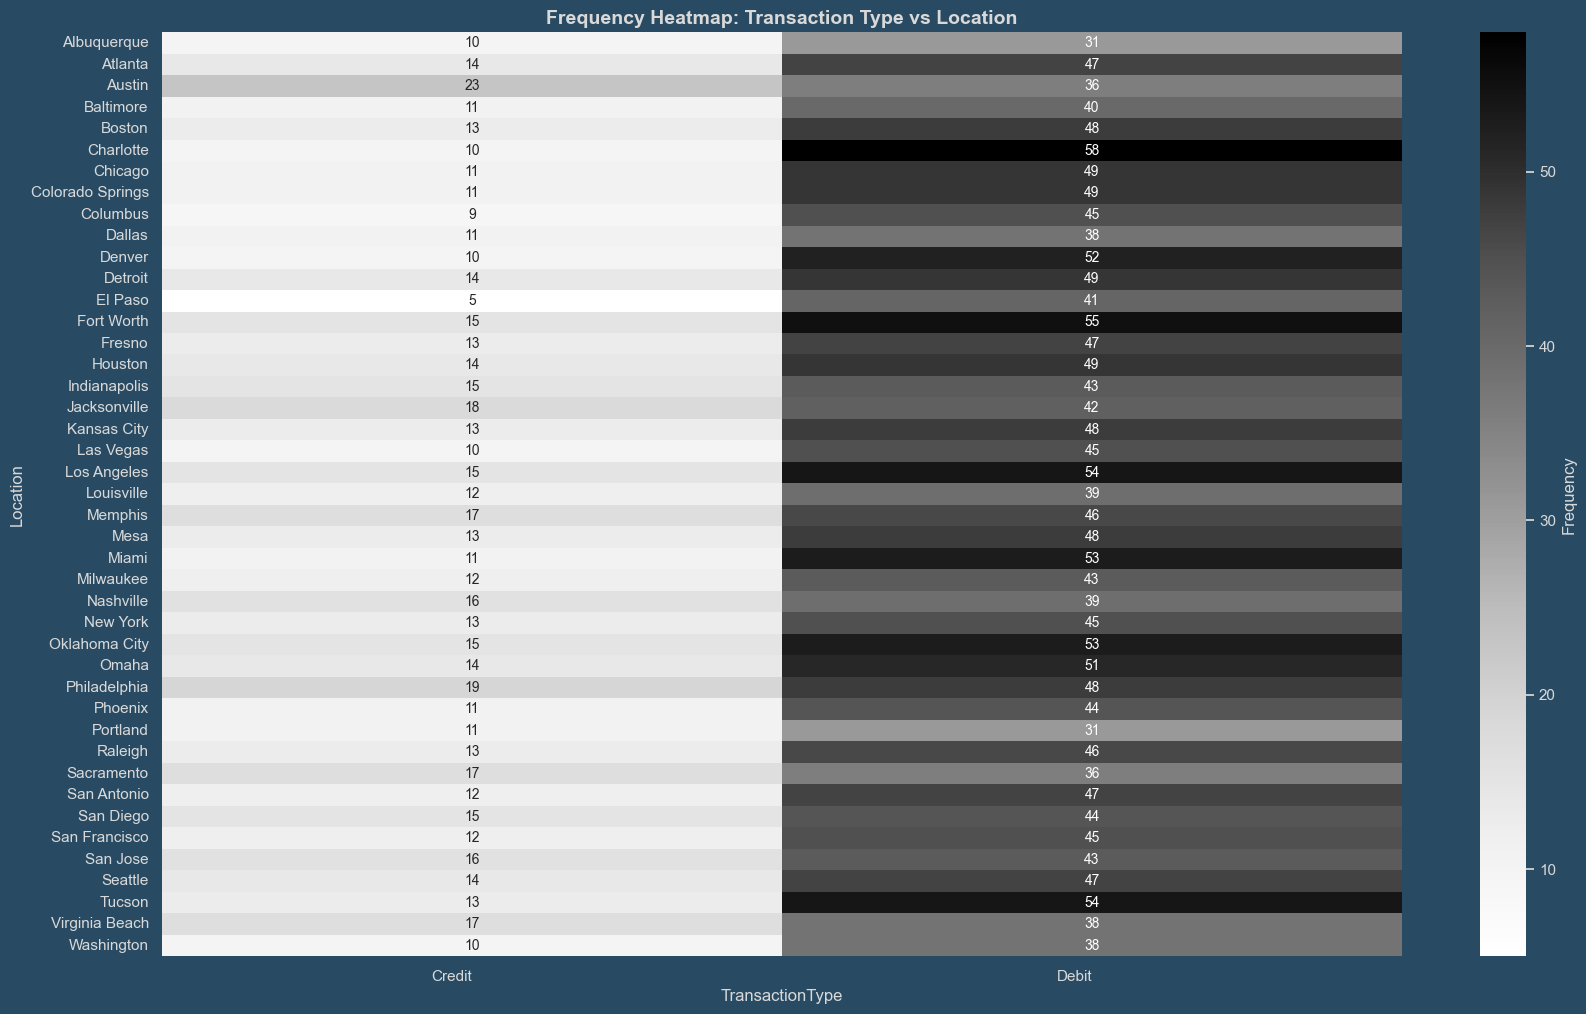

In [1036]:

# Create a cross-tabulation of Location and TransactionType
cross_tab = pd.crosstab(df['Location'], df['TransactionType'])

# Plot heatmap
plt.figure(figsize=(20, 12))  # Hacer el gráfico más amplio para mejorar la visualización

# Usar paleta de colores basada en tonos grises
sns.heatmap(cross_tab, annot=True, cmap="Greys", fmt="d", annot_kws={"size": 10, "ha": "center", "va": "center"}, cbar_kws={'label': 'Frequency'})

# Personalización adicional
plt.title('Frequency Heatmap: Transaction Type vs Location', color="#D9D9D9")

# Rotar las etiquetas del eje X y eje Y
plt.xticks(rotation=0, ha="right", color="#D9D9D9")  # Rotar etiquetas eje X
plt.yticks(rotation=0, color="#D9D9D9")  # Las etiquetas eje Y estarán a la izquierda y horizontales


# Mostrar el gráfico
plt.show()


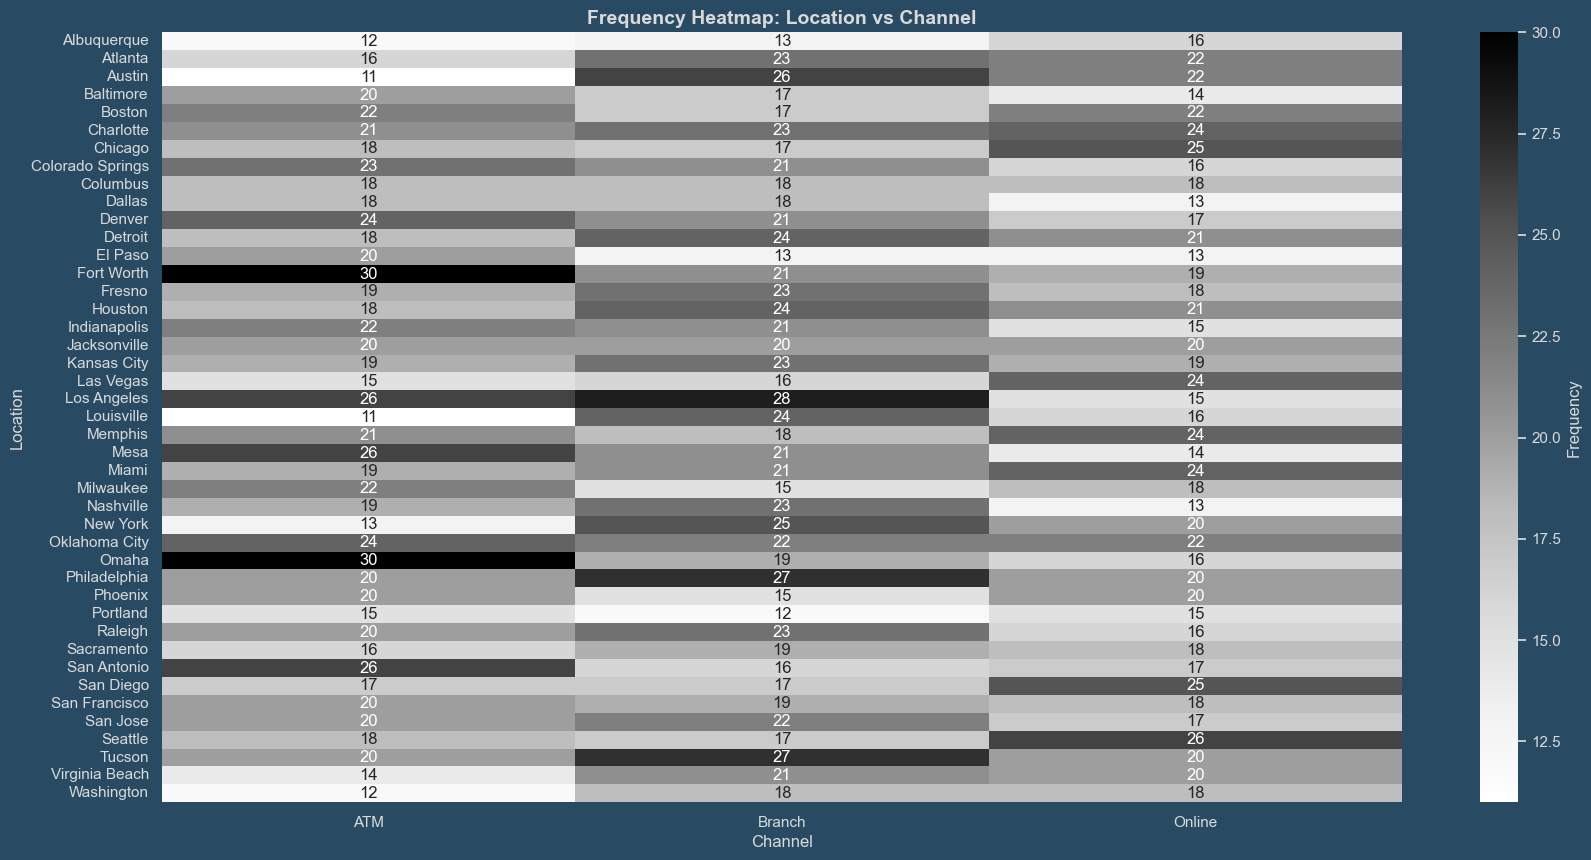

In [1037]:
# Create a cross-tabulation of Location and Channel
cross_tab = pd.crosstab(df['Location'], df['Channel'])

# Plot heatmap
plt.figure(figsize=(20, 10))  # Hacer el gráfico más grande para mejorar la visualización

# Usar paleta de colores basada en tonos grises
sns.heatmap(cross_tab, annot=True, cmap="Greys", fmt="d", annot_kws={"size": 12, "ha": "center", "va": "center"}, cbar_kws={'label': 'Frequency'})

# Personalización adicional
plt.title('Frequency Heatmap: Location vs Channel', color="#D9D9D9")
plt.xticks(rotation=0, color="#D9D9D9")  # Rotar las etiquetas del eje X y color
plt.yticks(rotation=0, color="#D9D9D9")  # Cambiar color de las etiquetas del eje Y

plt.show()


## Feature Engineering

### Time-Based Features:

In [1038]:
df['TimeSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()
df['TransactionHour'] = df['TransactionDate'].dt.hour

### Transaction Frequency:

In [1039]:
df['TransactionFrequency'] = df.groupby('AccountID')['TransactionID'].transform('count')

### Device and IP Usage:

In [1040]:
df['DeviceUsage'] = df.groupby('DeviceID')['AccountID'].transform('count')
df['IPUsage'] = df.groupby('IP Address')['AccountID'].transform('count')

### Merchant Preferences:

In [1042]:
df['MerchantPreference'] = df.groupby(['AccountID', 'MerchantID'])['TransactionID'].transform('count')

## Data Preprocessing

###  Feature Scaling

In [ ]:
# Select features for clustering
X = df[[
    'TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 
    'AccountBalance', 'TimeSinceLastTransaction', 'TransactionHour', 
    'TransactionFrequency', 'DeviceUsage', 'IPUsage', 'MerchantPreference',
    'TransactionType',  # Already encoded as binary
    'Channel_Branch', 'Channel_ATM', 'Channel_Online',  # One-hot encoded
]]

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Label Encoding

In [1045]:
# Encode categorical features
df['TransactionType'] = df['TransactionType'].map({'Debit': 0, 'Credit': 1})

# One-hot encode the Channel column
df = pd.get_dummies(df, columns=['Channel'], drop_first=False)


## Potential Frauds with K-Means Clustering

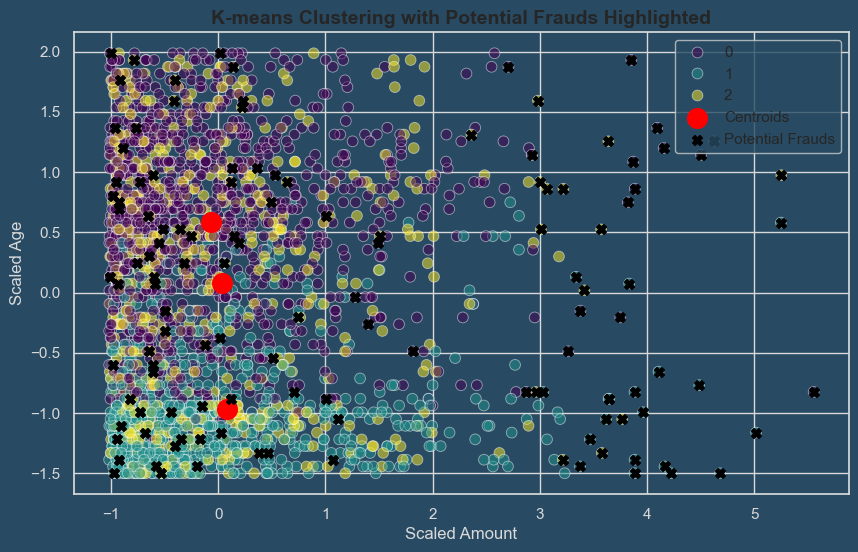

Number of potential frauds detected: 126


In [999]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'LoginAttempts', 'TransactionType']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels to the dataset
df['KMeans_Cluster'] = kmeans_labels


# Calculate distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)  # Change this value as needed

# Flag points above the threshold as potential frauds
df['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = df[df['Potential_Fraud']]
non_frauds = df[~df['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], 
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")

In [1000]:
frauds

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeSinceLastTransaction,TransactionHour,TransactionFrequency,DeviceUsage,IPUsage,MerchantPreference,Channel_ATM,Channel_Branch,Channel_Online,KMeans_Cluster,Potential_Fraud
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,0,Miami,D000046,55.154.161.250,M029,23,Student,158,5,673.35,2024-11-04 08:11:38,-48958477.0,16,6,8,5,1,True,False,False,1,True
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,1,Austin,D000574,165.114.224.47,M012,54,Engineer,30,1,8654.28,2024-11-04 08:06:53,-34699483.0,17,5,7,5,1,False,False,True,2,True
91,TX000092,AC00310,223.85,2023-10-02 16:36:10,0,Kansas City,D000481,133.223.159.151,M009,53,Engineer,55,4,2929.91,2024-11-04 08:08:01,-34443111.0,16,7,4,3,1,True,False,False,0,True
147,TX000148,AC00161,514.95,2023-04-13 18:37:48,0,New York,D000109,23.92.205.75,M056,41,Doctor,142,5,421.93,2024-11-04 08:10:01,-49296733.0,18,4,3,5,1,False,False,True,1,True
176,TX000177,AC00363,1362.55,2023-02-10 18:07:07,0,El Paso,D000213,93.52.44.101,M001,29,Engineer,106,1,2429.68,2024-11-04 08:11:05,-54655438.0,18,12,3,5,1,True,False,False,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,TX002381,AC00098,1173.74,2023-09-25 16:44:52,1,Virginia Beach,D000639,193.190.29.63,M086,61,Doctor,61,1,10456.24,2024-11-04 08:07:31,-35047359.0,16,5,3,6,1,False,False,True,2,True
2403,TX002404,AC00111,1493.00,2023-06-07 17:05:41,0,Colorado Springs,D000344,136.162.111.135,M096,69,Retired,151,1,1619.16,2024-11-04 08:07:07,-44550086.0,17,7,4,4,1,True,False,False,0,True
2414,TX002415,AC00028,1664.33,2023-09-25 17:11:19,0,San Antonio,D000072,116.106.207.139,M064,18,Student,65,1,1588.31,2024-11-04 08:07:07,-35045748.0,17,3,6,5,1,False,True,False,1,True
2423,TX002424,AC00340,332.06,2023-06-21 16:38:54,0,Seattle,D000365,94.37.250.128,M086,29,Doctor,221,4,11826.52,2024-11-04 08:06:23,-43342049.0,16,3,3,4,1,True,False,False,0,True
